# Conectar al drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Seleccionar dir dee la data

In [5]:
ls drive/MyDrive/DEP19/ML/task/

train.csv


In [7]:
cd drive/MyDrive/DEP19/ML/task/

/content/drive/MyDrive/DEP19/ML/task


In [8]:
ls

train.csv


# Cargar e instalar moodulos a usar

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import joblib

# Cargar data

In [43]:
def cargarData(file_path):
  return pd.read_csv(file_path)

def limpiarDatos(df):
    # Eliminar filas con valores NaN
    df_limpio = df.dropna()
    return df_limpio

def analizarDatos(df):
    # Verificar las columnas del DataFrame
    print("Columnas del DataFrame:", df.columns)

    # Configurar seaborn
    sns.set(style="whitegrid")

    # Visualizar la distribución de cada columna numérica
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        plt.figure(figsize=(12, 6))  # Aumentar el tamaño de la figura
        sns.histplot(df[column], kde=True, bins=30, color='blue', edgecolor='black')  # Ajustar el número de bins y los colores
        plt.title(f'Distribución de {column}', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frecuencia', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)  # Añadir una cuadrícula
        plt.show()

def analizarDatos2(df):
    # Configurar seaborn
    sns.set(style="whitegrid")

    # Visualizar las relaciones entre las variables numéricas usando pairplot
    plt.figure(figsize=(12, 12))
    pairplot = sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
    pairplot.fig.suptitle('Pairplot de las Variables Numéricas', y=1.02, fontsize=16)
    plt.show()


def analizarCorrelacion(df):
    # Seleccionar solo las columnas numéricas
    df_numerico = df.select_dtypes(include=['float64', 'int64'])

    # Calcular la matriz de correlación
    corr = df_numerico.corr()

    # Configurar seaborn
    sns.set(style="white")

    # Visualizar la matriz de correlación usando un heatmap
    plt.figure(figsize=(12, 10))
    heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    heatmap.set_title('Matriz de Correlación', fontsize=16)
    plt.show()

def preprocesarDatos(df):
    features = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
                'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']
    target = 'Transported'

    X = df[features]
    y = df[target]

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

    numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    categorical_features = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    return preprocessor, X_train, X_val, X_test, y_train, y_val, y_test

def entrenarYGuardarModelo(preprocessor, X_train, X_val, X_test, y_train, y_val, y_test, model_path):
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(random_state=42))])

    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f'Validation Accuracy: {val_accuracy:.2f}')

    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'Test Accuracy: {test_accuracy:.2f}')

    # Guardar el modelo
    joblib.dump(model, model_path)
    print(f'Modelo guardado en {model_path}')

    return model

In [44]:
def main():
    file_path = './train.csv'
    model_path = './spaceship_titanic_model.pkl'

    spaceship_df = cargarData(file_path)
    print("Data Cargada")
    print(spaceship_df.describe())

    spaceship_df_limpio = limpiarDatos(spaceship_df)
    print("Data cargada y limpia")
    print(spaceship_df_limpio.head())

    analizarDatos(spaceship_df_limpio)
    analizarDatos2(spaceship_df_limpio)
    analizarCorrelacion(spaceship_df_limpio)
    print("No hay relación en la data de acuerdo a la matriz de correlación. Por lo que hemos de usar todos los features.")

    preprocessor, X_train, X_val, X_test, y_train, y_val, y_test = preprocesarDatos(spaceship_df_limpio)
    model = entrenarYGuardarModelo(preprocessor, X_train, X_val, X_test, y_train, y_val, y_test, model_path)


Data Cargada
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  
Data cargada y limpia
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    

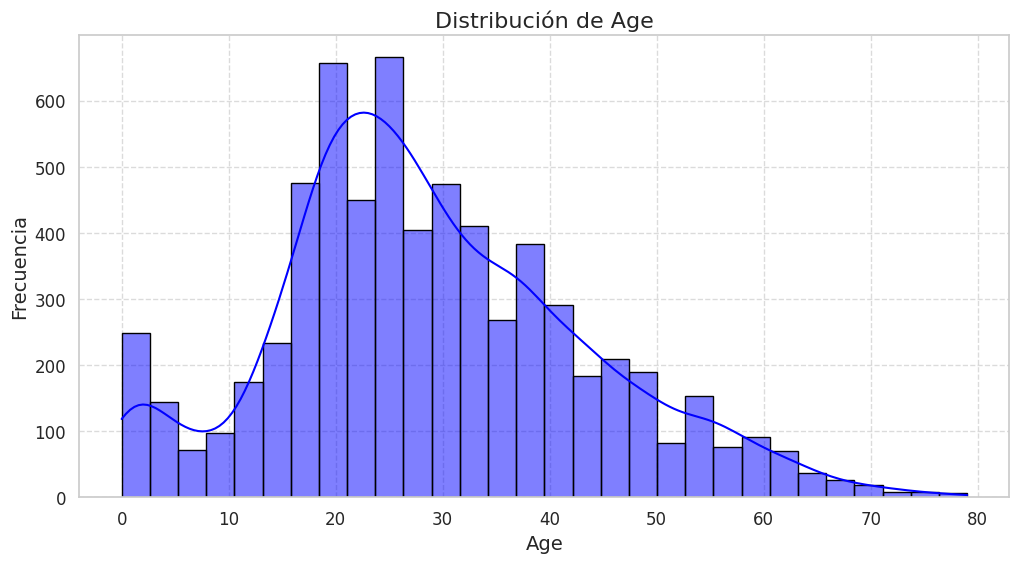

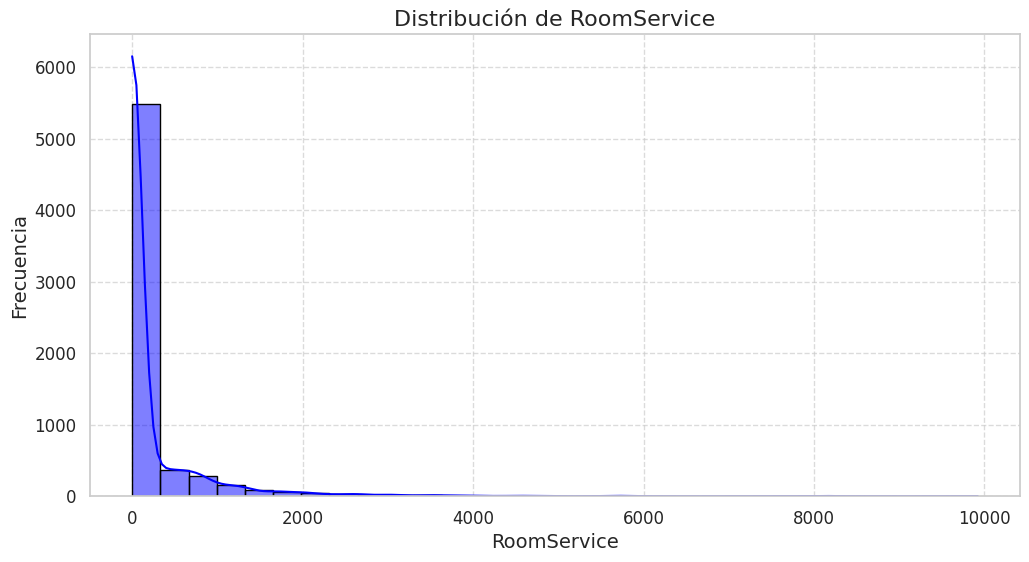

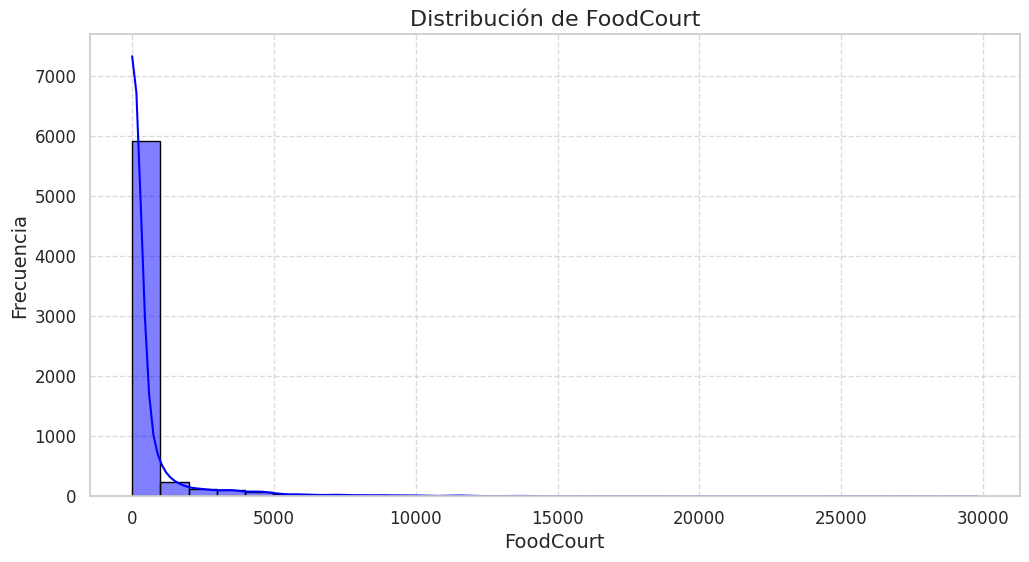

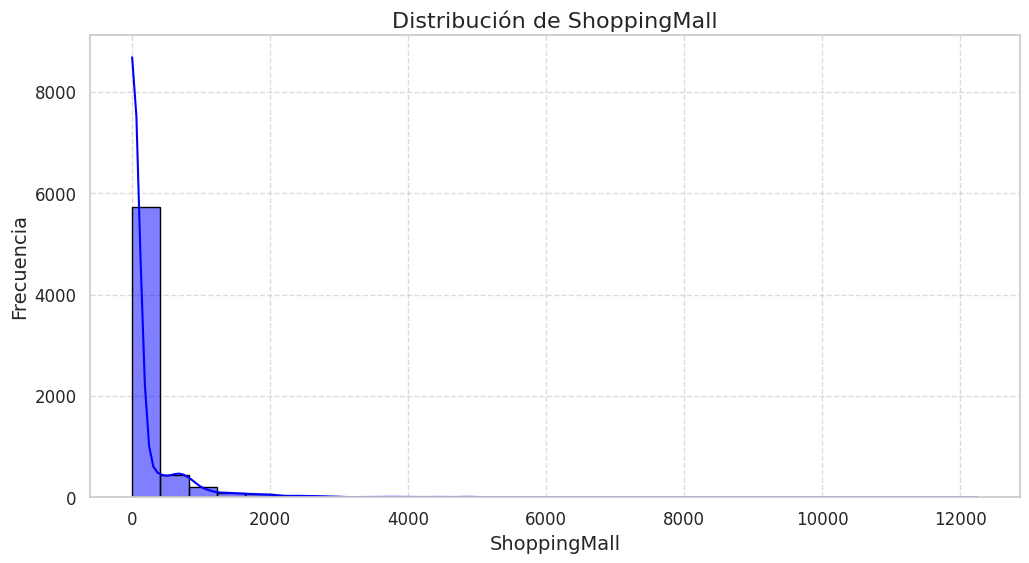

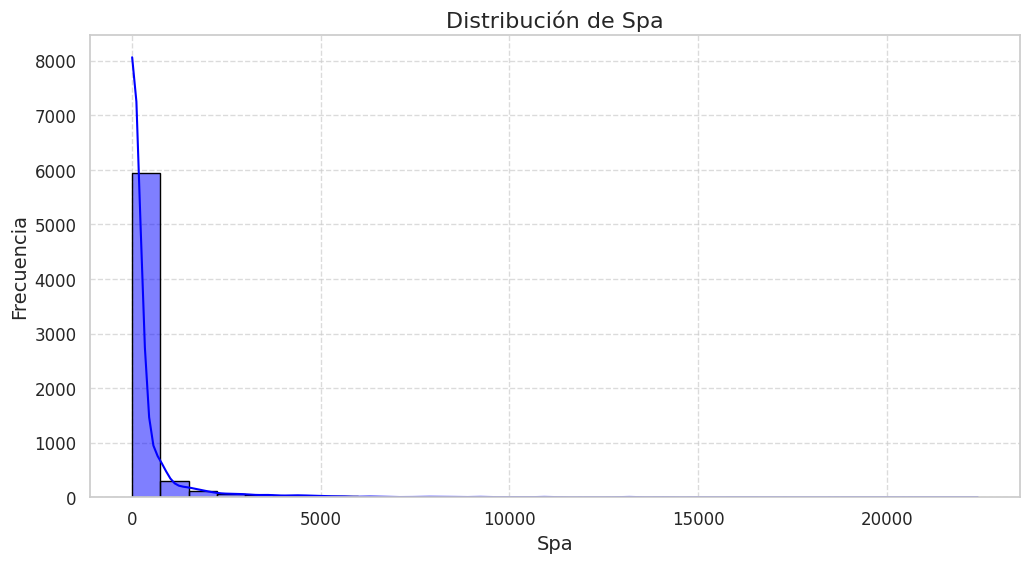

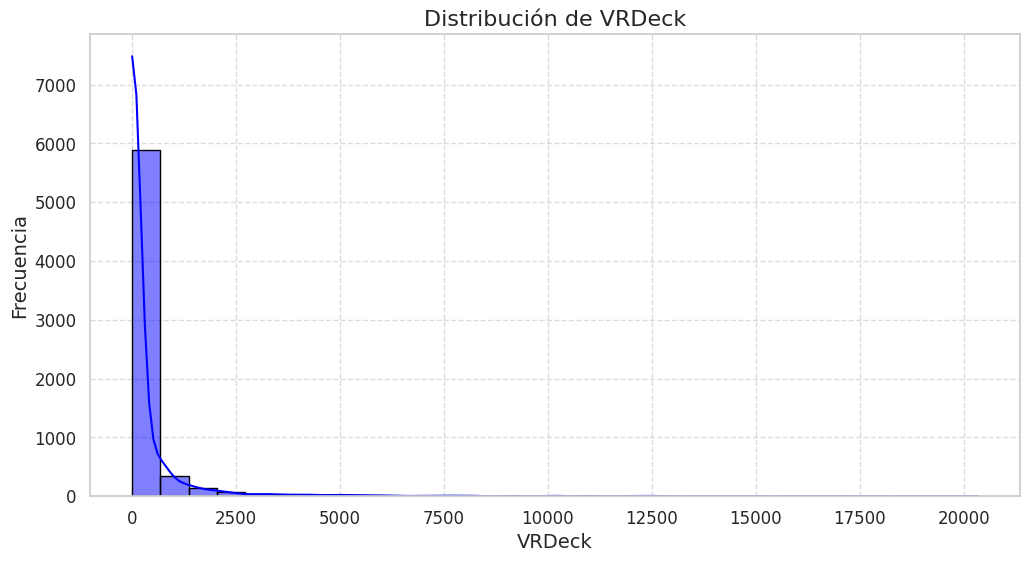

<Figure size 1200x1200 with 0 Axes>

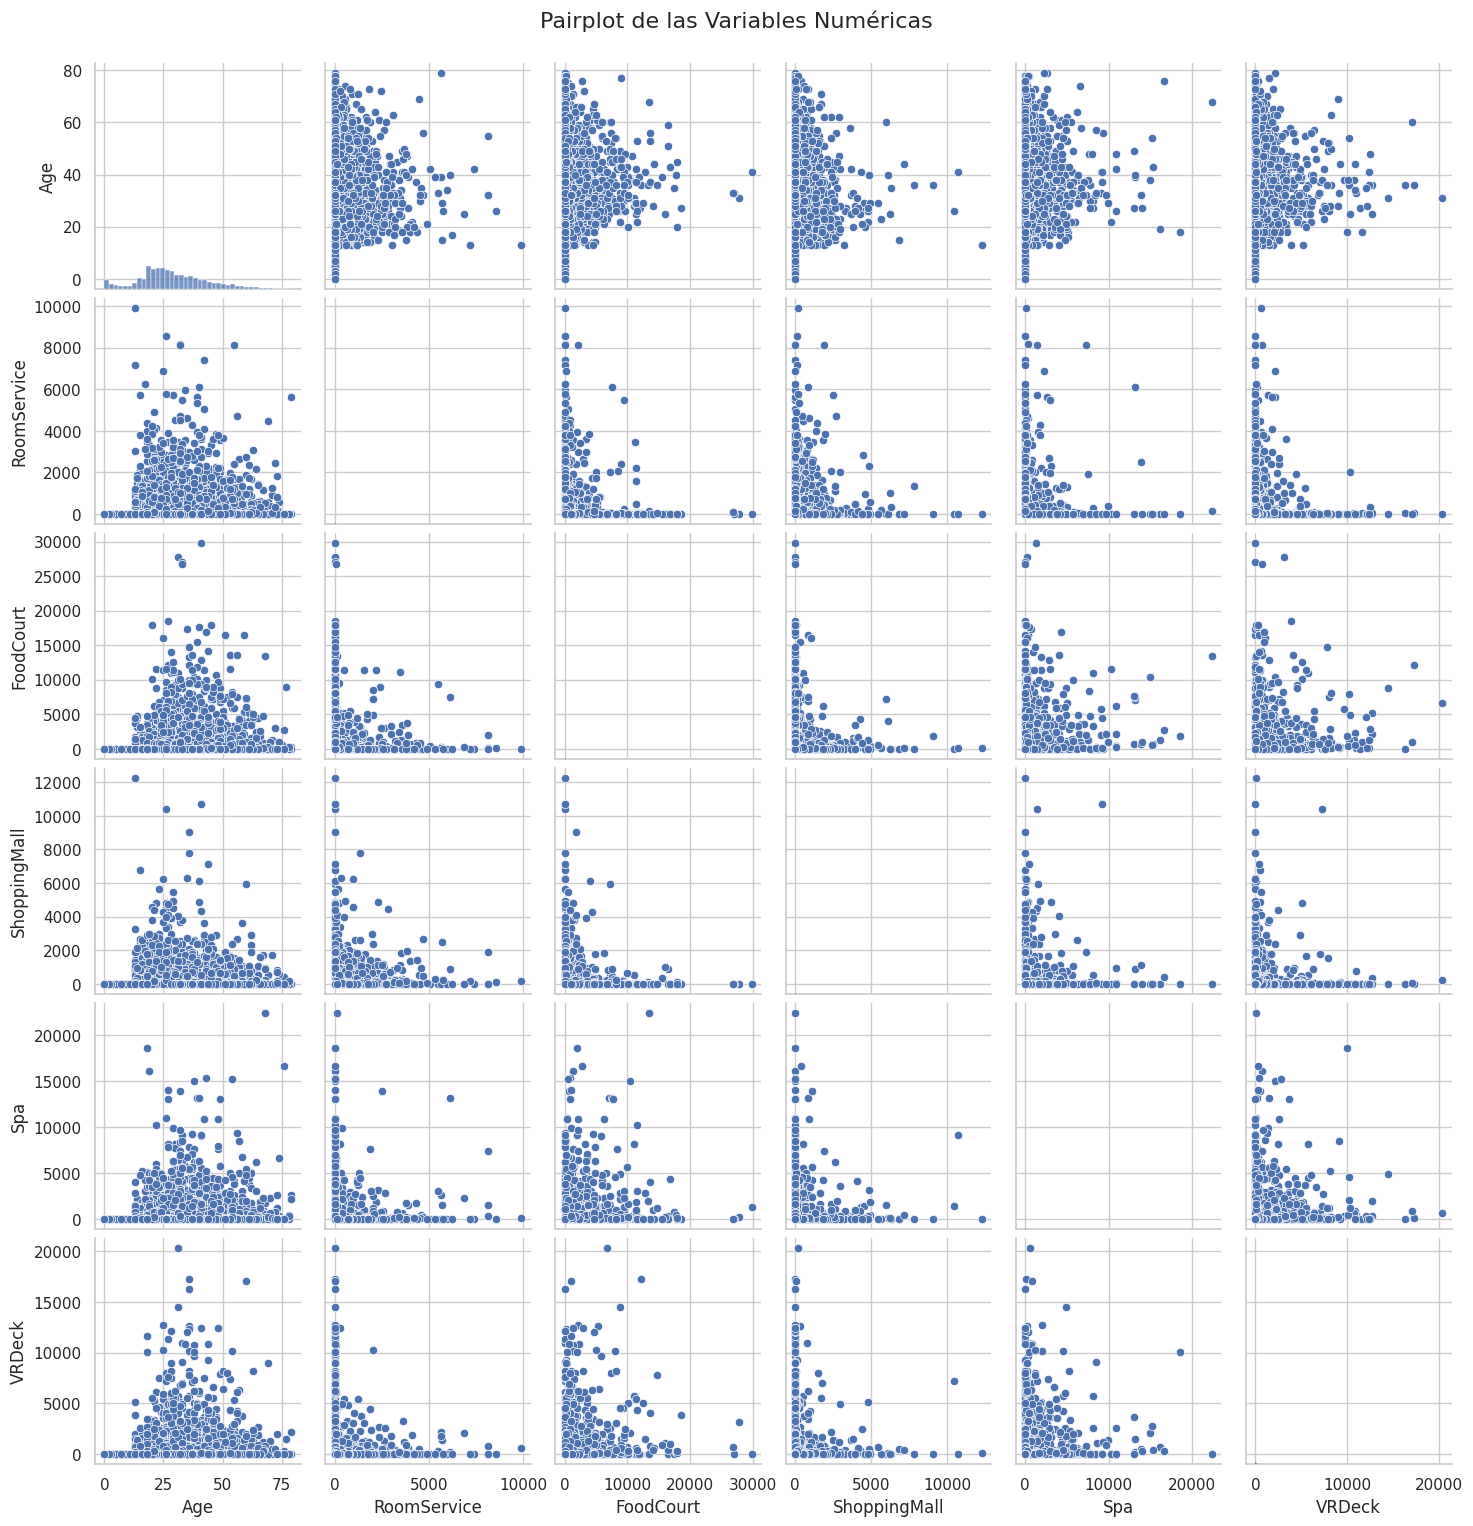

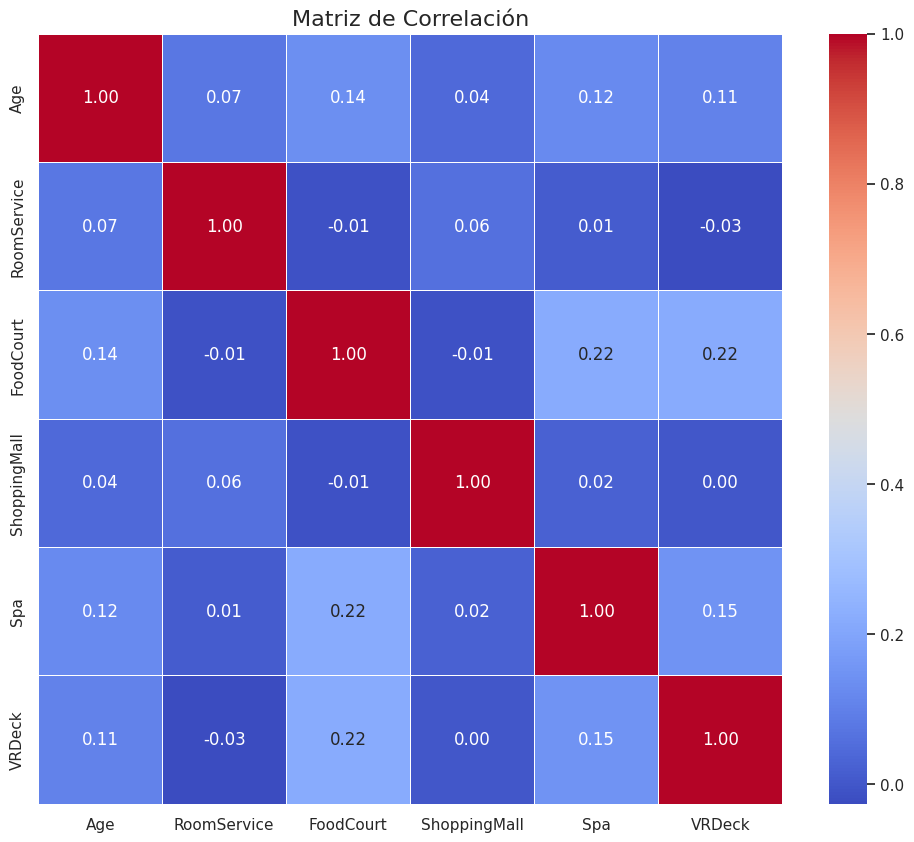

No hay relación en la data de acuerdo a la matriz de correlación. Por lo que hemos de usar todos los features.
Validation Accuracy: 0.81
Test Accuracy: 0.80
Modelo guardado en ./spaceship_titanic_model.pkl


In [45]:
# Ejecutar la función principal
if __name__ == "__main__":
    main()